In [1]:
# Remember to adjust your student ID in meta.xml
import numpy as np
import pickle
import random
import gym
from simple_custom_taxi_env import SimpleTaxiEnv
from tqdm import tqdm

c:\Users\qwer9\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\envs\registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


In [2]:
def get_action(obs):
    
    # TODO: Train your own agent
    # HINT: If you're using a Q-table, consider designing a custom key based on `obs` to store useful information.
    # NOTE: Keep in mind that your Q-table may not cover all possible states in the testing environment.
    #       To prevent crashes, implement a fallback strategy for missing keys. 
    #       Otherwise, even if your agent performs well in training, it may fail during testing.


    return random.choice([0, 1, 2, 3, 4, 5]) # Choose a random action
    # You can submit this random agent to evaluate the performance of a purely random strategy.


In [18]:
def table_q_learning(episode = 5000, alpha = 0.1, gamma = 0.99, epsilon_start = 1.0, epsilon_end = 0.1, epsilon_decay = 0.999):
    q_table = {}
    total_rewards = []

    for i in tqdm(range(episode)):
        env = SimpleTaxiEnv(fuel_limit=5000)
        raw_state, _ = env.reset()
        total_reward = 0
        done = False
        step_count = 0
        epsilon = epsilon_start
        taxi_row, taxi_col, _,_,_,_,_,_,_,_,obstacle_north, obstacle_south, obstacle_east, obstacle_west, passenger_look, destination_look = raw_state
        taxi_pos = (taxi_row, taxi_col)
        state = ( obstacle_south, obstacle_north, obstacle_east, obstacle_west)

        saved = False
        # if (i + 1) % 10000 == 0:
        #     saved = True
        #     print(f"=========================={i+1}th episodes Start!==========================")
        
        while not done:
            if state not in q_table:
                q_table[state] = np.zeros(6)
            if random.uniform(0, 1) < epsilon:
                action = random.choice([0, 1, 2, 3, 4, 5])
            else:
                action = np.argmax(q_table[state])
            next_raw_state, reward, done, _ = env.step(action)

            if saved:
                env.render_env(taxi_pos, action = action, step = step_count)

            taxi_row, taxi_col, _,_,_,_,_,_,_,_,obstacle_north, obstacle_south, obstacle_east, obstacle_west, passenger_look, destination_look = next_raw_state
            taxi_pos = (taxi_row, taxi_col)
            next_state = ( obstacle_south, obstacle_north, obstacle_east, obstacle_west)
            if next_state not in q_table:
                q_table[next_state] = np.zeros(6)
            q_table[state][action] = q_table[state][action] + alpha*(reward + gamma*np.max(q_table[next_state]) - q_table[state][action])
            state = next_state
            total_reward += reward
            step_count += 1
            if epsilon > epsilon_end:
                epsilon *= epsilon_decay
            # if step_count > 500:
            #     break

        total_rewards.append(total_reward)
        if saved:
            print(f"Episode: {i + 1}/{episode}, Total Reward: {total_reward}, Steps: {step_count}, Epsilon: {epsilon}")

    return q_table, total_rewards

def save_q_table(q_table):
    with open('q_table.pkl', 'wb') as f:
        pickle.dump(q_table, f)


In [19]:
q_table, total_rewards = table_q_learning(episode=5000, alpha=0.1, gamma=0.99, epsilon_start=1.0, epsilon_end=0.0001, epsilon_decay=0.999)
save_q_table(q_table)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [05:30<00:00, 15.14it/s]


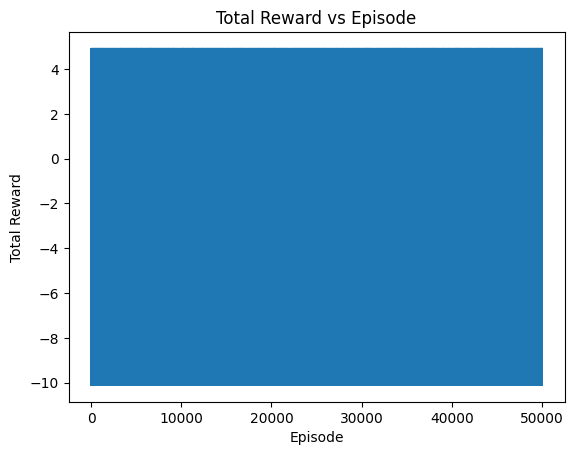

In [15]:
# Plot the rewards
import matplotlib.pyplot as plt
plt.plot(total_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward vs Episode")
plt.show()

In [16]:
print(q_table)

{(0, 0, 1, 0): array([384.14835929, 384.83729892, 376.32365672, 385.73125736,
       370.96165302, 371.00331124]), (0, 0, 0, 0): array([388.03827582, 387.84232882, 387.46949587, 387.24060817,
       373.74489494, 373.67282783]), (0, 0, 0, 1): array([384.5197225 , 384.85609736, 385.41854888, 375.55468999,
       370.66907223, 370.90777308]), (1, 1, 0, 0): array([359.74837891, 355.56333426, 370.32915431, 375.9564435 ,
       345.8110897 , 348.07736229]), (1, 0, 1, 0): array([369.46102833, 380.68470514, 370.06270184, 382.51654762,
       359.95576469, 360.83276691]), (1, 0, 0, 0): array([376.95349257, 387.31316816, 379.12665668, 385.23238226,
       371.64698607, 371.58169893]), (0, 1, 1, 0): array([380.30779738, 368.44735269, 369.23966932, 384.14219014,
       364.67057242, 364.07991652]), (0, 1, 0, 0): array([387.53549404, 376.9180744 , 383.15520162, 384.95761332,
       371.22580092, 372.1540913 ]), (0, 1, 0, 1): array([378.97162905, 366.47002105, 383.22975046, 369.35752129,
       365

In [17]:
actions = [ 'Move South', 'Move North', 'Move East', 'Move West', 'Pickup', 'Dropoff']
action_table = {}
for state, action in q_table.items():
    action_table[state] = np.argmax(action)
print(action_table)

{(0, 0, 1, 0): 3, (0, 0, 0, 0): 0, (0, 0, 0, 1): 2, (1, 1, 0, 0): 3, (1, 0, 1, 0): 3, (1, 0, 0, 0): 1, (0, 1, 1, 0): 3, (0, 1, 0, 0): 0, (0, 1, 0, 1): 2, (1, 0, 1, 1): 1, (0, 0, 1, 1): 0, (1, 0, 0, 1): 1, (1, 1, 1, 0): 3, (1, 1, 0, 1): 2, (0, 1, 1, 1): 0, (1, 1, 1, 1): 3}
